# Ask the Calculator Glass Questions

Here we are going to ask the calculator questions about glass.

In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_DEMICE' / 'TEMP')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [2]:
import PV_DEMICE
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

## 0% & 100% Recycle of Glass

First, create the simulation and the scenarios, pointing them at the Temp folder.

In [3]:
sim1 = PV_DEMICE.Simulation(name='Recycle Extremes', path=testfolder)
sim1.createScenario(name='Recycle_0', file=r'..\baselines\baseline_modules_US.csv')
sim1.scenario['Recycle_0'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

sim1.createScenario(name='Recycle_100', file=r'..\baselines\baseline_modules_US.csv')
sim1.scenario['Recycle_100'].addMaterial('glass', file=r'..\baselines\baseline_material_glass.csv')

path = C:\Users\blond\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_DEMICE\TEMP


In [4]:
sim1.calculateMassFlow()

Working on Scenario:  Recycle_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Recycle_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


Now set the variables within the scenarios to the relevant quantities

In [5]:
#sim1.scenario['Recycle_0'].data.keys() #use this to see what can be changed
sim1.scenario['Recycle_100'].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_modules_NotRecycled', 'mat_modules_NotCollected',
       'mat_EOL_sento_Recycling', 'mat_EOL_NotRecycled_Landfilled',
       'mat_EOL_Recycled', 'mat_EOL_Recycled_Losses_Landfilled',
       'mat_EOL_Recycled_2_HQ', 'mat_EOL_Recycled_2_OQ',
       'mat_EoL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_UsedinManufacturing', 'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto_Recycling', 'mat_MFG_Scrap_Landfilled',
       'mat_MFG_Scrap_Recycled_Successfully',
       'mat_MFG_Scrap_Recycled_Losses_Landfilled', 'mat_MFG_Recycled_into_HQ',
       'mat_MFG_Recycled_into_OQ', 'mat_MFG_Recycled_H

In [6]:
sim1.scenario['Recycle_0'].data['mod_EOL_collected_recycled']=0
sim1.scenario['Recycle_0'].data['mod_Repowering']=0
sim1.scenario['Recycle_0'].data['mod_Repairing']=0

sim1.scenario['Recycle_100'].data['mod_EOL_collected_recycled']=100
sim1.scenario['Recycle_100'].data['mod_EOL_collection_eff']=100
sim1.scenario['Recycle_100'].data['mod_Repowering']=0
sim1.scenario['Recycle_100'].data['mod_Repairing']=0
 
#directs all glass back to mfg to offset virgin
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_eff'] = 100 #100% efficiency of recycling
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_EOL_Recycled_into_HQ'] = 100 
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_EoL_Recycled_HQ_into_MFG'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_recycled'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_recycling_eff'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ'] = 100
sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled_into_HQ_Reused4MFG'] = 100

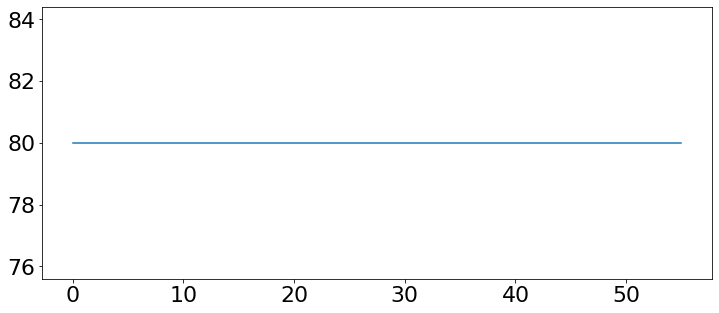

In [7]:
#plt.plot(sim1.scenario['Recycle_100'].data['mod_EOL_collection_eff']) #check out what module paramaters settings
plt.plot(sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled']) #check out what material parameters settings

Now run the simulation

In [8]:
sim1.calculateMassFlow()

Working on Scenario:  Recycle_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  Recycle_100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


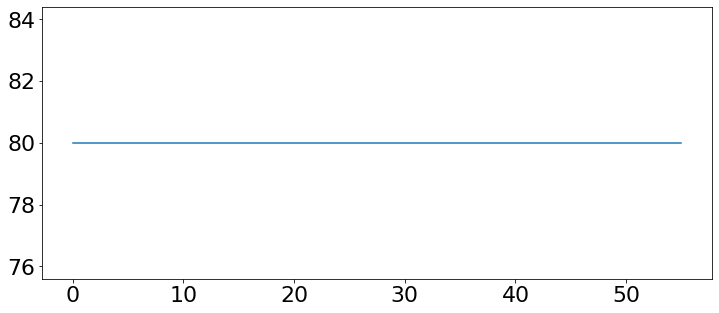

In [13]:
#plt.plot(sim1.scenario['Recycle_100'].data['mod_EOL_collection_eff']) #check out what module paramaters settings
plt.plot(sim1.scenario['Recycle_100'].material['glass'].materialdata['mat_MFG_scrap_Recycled']) #check out what material parameters settings

Now make some pretty pretty plots

In [9]:
#sim1.scenario['Recycle_0'].data.keys() #choices of what to plot

In [10]:
#sim1.plotScenariosComparison(keyword='Installed_Capacity_[W]') #make sure installed capacity is same

There is a separate plotting function for materials

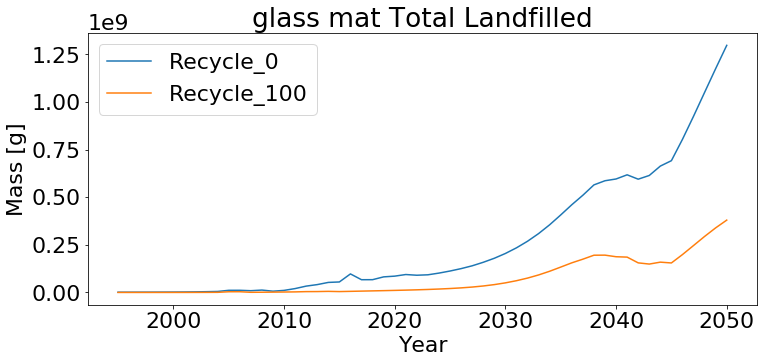

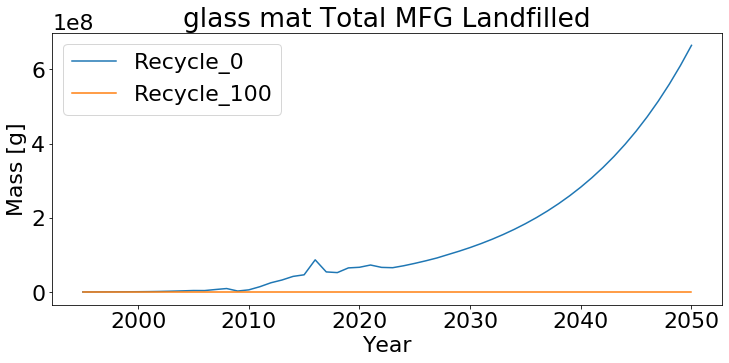

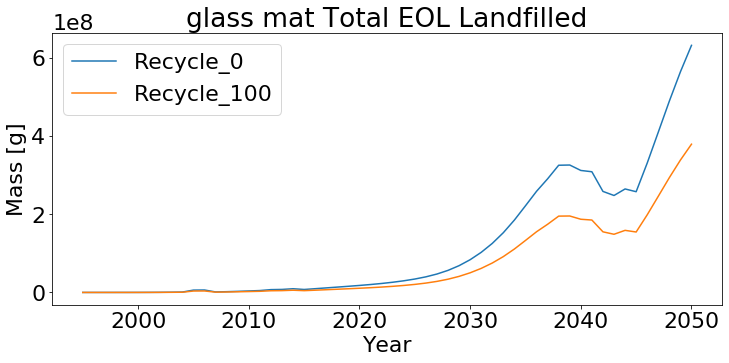

In [11]:
sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_MFG_Landfilled')
sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_EOL_Landfilled')

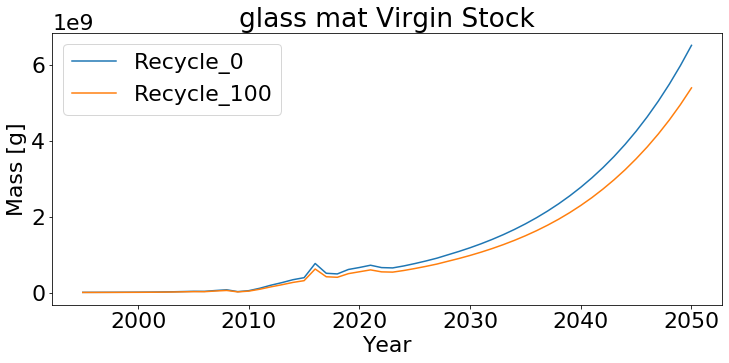

In [12]:
sim1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Virgin_Stock')